## Lineer Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("community_health.csv")

In [4]:
df

,age,gender,race/ethnicity,weight,height,visits
0,47,female,group D,247,65,28
1,26,male,group C,283,66,23
2,26,male,group B,201,68,14
3,39,male,group C,237,73,21
4,55,male,group A,199,61,27
...,...,...,...,...,...,...
995,43,female,group E,273,68,22
996,34,female,group D,247,76,16
997,54,female,group B,310,75,27
998,38,male,group E,64,75,7


### About Data

In [5]:
df["age"].corr(df["visits"])

0.5395427263086969

In [6]:
unique_genders = df['gender'].unique()
print(unique_genders)


['female' 'male']


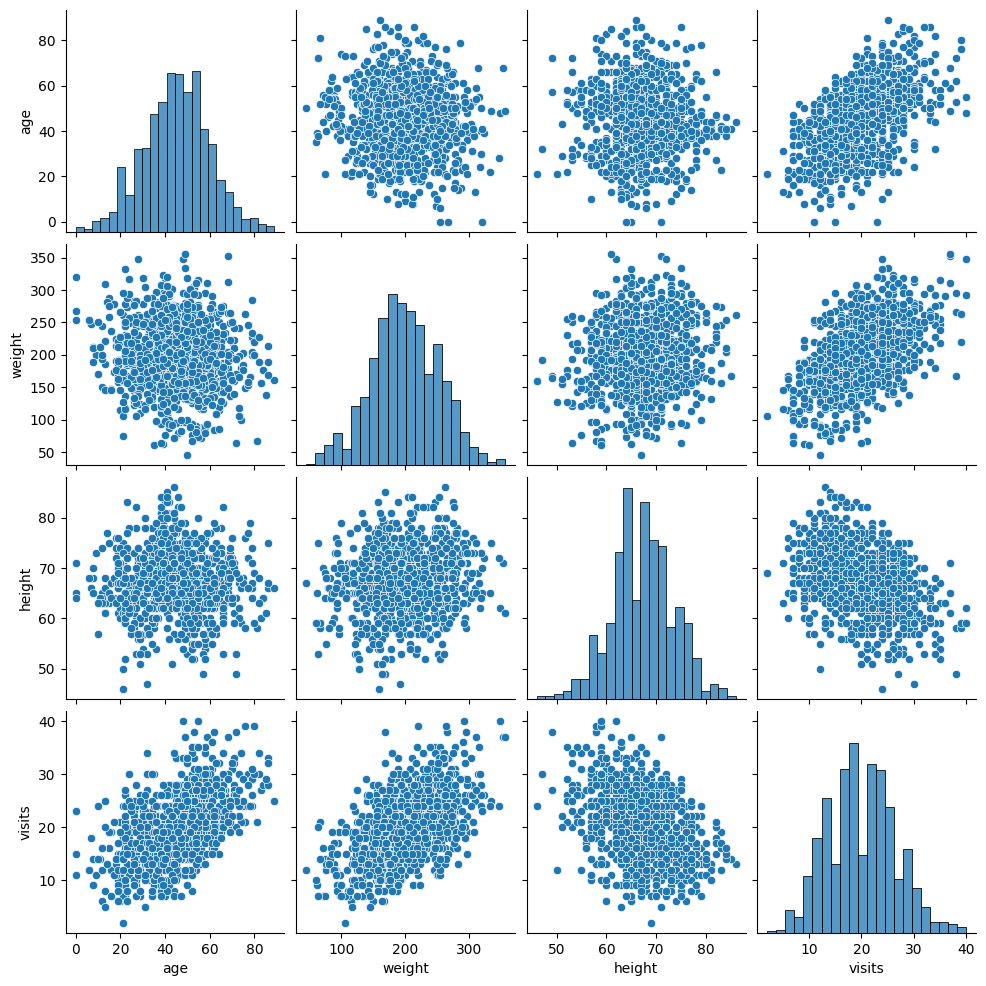

In [7]:
sns.pairplot(df)

## Data Edition

In [8]:
df.head(3)

,age,gender,race/ethnicity,weight,height,visits
0,47,female,group D,247,65,28
1,26,male,group C,283,66,23
2,26,male,group B,201,68,14


### For turning height and weight to cm and kilogram

In [9]:
df["weight"] = round(df["weight"] * 0.45)

In [10]:
df["height"] = round(df["height"] * 2.54)

In [11]:
df.head(3)

,age,gender,race/ethnicity,weight,height,visits
0,47,female,group D,111.0,165.0,28
1,26,male,group C,127.0,168.0,23
2,26,male,group B,90.0,173.0,14


In [12]:
df["gender"].replace({
    "female" : 0,
    "male" : 1
},inplace= True)

/var/folders/1y/yx271f4n4s52fqfr437r3qqh0000gn/T/ipykernel_1343/1300198162.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["gender"].replace({
/var/folders/1y/yx271f4n4s52fqfr437r3qqh0000gn/T/ipykernel_1343/1300198162.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["gender"].replace({


In [13]:
df.head(3)

,age,gender,race/ethnicity,weight,height,visits
0,47,0,group D,111.0,165.0,28
1,26,1,group C,127.0,168.0,23
2,26,1,group B,90.0,173.0,14


In [14]:
df["race/ethnicity"] = df["race/ethnicity"].replace({
    "group A" : 1,
    "group B" : 2,
    "group C" : 3,
    "group D" : 4,
    "group E" : 5    
})

/var/folders/1y/yx271f4n4s52fqfr437r3qqh0000gn/T/ipykernel_1343/2620647026.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["race/ethnicity"] = df["race/ethnicity"].replace({


In [15]:
df.head()

,age,gender,race/ethnicity,weight,height,visits
0,47,0,4,111.0,165.0,28
1,26,1,3,127.0,168.0,23
2,26,1,2,90.0,173.0,14
3,39,1,3,107.0,185.0,21
4,55,1,1,90.0,155.0,27


In [16]:
df.rename(columns = {
    "race/ethnicity" : "race"
})

,age,gender,race,weight,height,visits
0,47,0,4,111.0,165.0,28
1,26,1,3,127.0,168.0,23
2,26,1,2,90.0,173.0,14
3,39,1,3,107.0,185.0,21
4,55,1,1,90.0,155.0,27
...,...,...,...,...,...,...
995,43,0,5,123.0,173.0,22
996,34,0,4,111.0,193.0,16
997,54,0,2,140.0,190.0,27
998,38,1,5,29.0,190.0,7


In [17]:
df.to_csv("community_health_MLR.csv",index=False)

## Train Test Split

In [18]:
X = df.drop("visits",axis=1) # axis = 1 enables to delete columns 

In [19]:
y = df["visits"]

In [20]:
X

,age,gender,race/ethnicity,weight,height
0,47,0,4,111.0,165.0
1,26,1,3,127.0,168.0
2,26,1,2,90.0,173.0
3,39,1,3,107.0,185.0
4,55,1,1,90.0,155.0
...,...,...,...,...,...
995,43,0,5,123.0,173.0
996,34,0,4,111.0,193.0
997,54,0,2,140.0,190.0
998,38,1,5,29.0,190.0


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=99)

In [23]:
X_train.head()

,age,gender,race/ethnicity,weight,height
26,45,0,4,100.0,196.0
155,21,1,5,84.0,178.0
872,47,1,2,62.0,178.0
383,64,0,4,72.0,173.0
648,50,1,3,93.0,163.0


In [1]:
from sklearn.linear_model import LinearRegression

In [24]:
regr = LinearRegression()

In [25]:
regr.fit(X_train,y_train)

LinearRegression()

In [28]:
test_pred = regr.predict(X_test)

In [29]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [32]:
print("Theta : ", round(regr.coef_[0],2))
print("intercept : ", round(regr.intercept_,2))
print("R^2 : ", round(r2_score(y_test,test_pred),2))
print("MAE : ",round(mean_absolute_error(y_test,test_pred),2))
print("RMSE : ",round(np.sqrt(mean_squared_error(y_test,test_pred))))

Theta :  0.25
intercept :  22.82
R^2 :  0.84
MAE :  2.24
RMSE :  3


In [33]:
df["visits"].mean() , df["visits"].std()

(19.956, 6.455054742737023)

# Last Model

In [34]:
lastRegrModel = LinearRegression()

In [35]:
lastRegrModel.fit(X,y)

LinearRegression()

In [36]:
y_hat = lastRegrModel.predict(X)

In [37]:
lastRegrModel.coef_

array([ 0.24632879,  0.09839742,  0.01495996,  0.17715817, -0.18001305])

In [38]:
X.head()

,age,gender,race/ethnicity,weight,height
0,47,0,4,111.0,165.0
1,26,1,3,127.0,168.0
2,26,1,2,90.0,173.0
3,39,1,3,107.0,185.0
4,55,1,1,90.0,155.0


In [39]:
coef_df = pd.DataFrame(lastRegrModel.coef_,X.columns,columns=["Coefficients"])

In [40]:
coef_df

,Coefficients
age,0.246329
gender,0.098397
race/ethnicity,0.014960
weight,0.177158
height,-0.180013


In [42]:
print(df["age"].mean())
print(df["gender"].mean())
print(df["race/ethnicity"].mean())
print(df["weight"].mean())
print(df["height"].mean())



45.019
0.481
3.155
89.574
170.914


In [45]:
human = [[30,0,1,60,164]]

In [47]:
lastRegrModel.predict(human)
# according to our model, this human visits hospital 12 times 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.18215443])

In [50]:
okan = [[25,1,1,80,187]]

In [51]:
lastRegrModel.predict(okan)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10.4517712])

In [52]:
X.iloc[135]

age                48.0
gender              1.0
race/ethnicity      4.0
weight            107.0
height            180.0
Name: 135, dtype: float64

In [53]:
testingModelHuman = [[48,1,4,107,180]]

In [56]:
lastRegrModel.predict(testingModelHuman)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([22.20557531])

In [57]:
y.iloc[135]

24

## Save Model

In [58]:
from joblib import dump, load

In [59]:
dump(lastRegrModel,"personHospitalVisit.joblib")

['personHospitalVisit.joblib']

In [60]:
model_download = load("personHospitalVisit.joblib")

In [61]:
model_download.predict(okan)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10.4517712])

## Residual

In [62]:
residual = y_hat - y

In [63]:
residual

0     -2.730322
1     -0.525298
2      1.004824
3     -1.926409
4     -1.626366
         ...   
995    2.985116
996    1.027038
997    0.601320
998   -2.861221
999    3.407172
Name: visits, Length: 1000, dtype: float64

<Axes: xlabel='visits', ylabel='visits'>

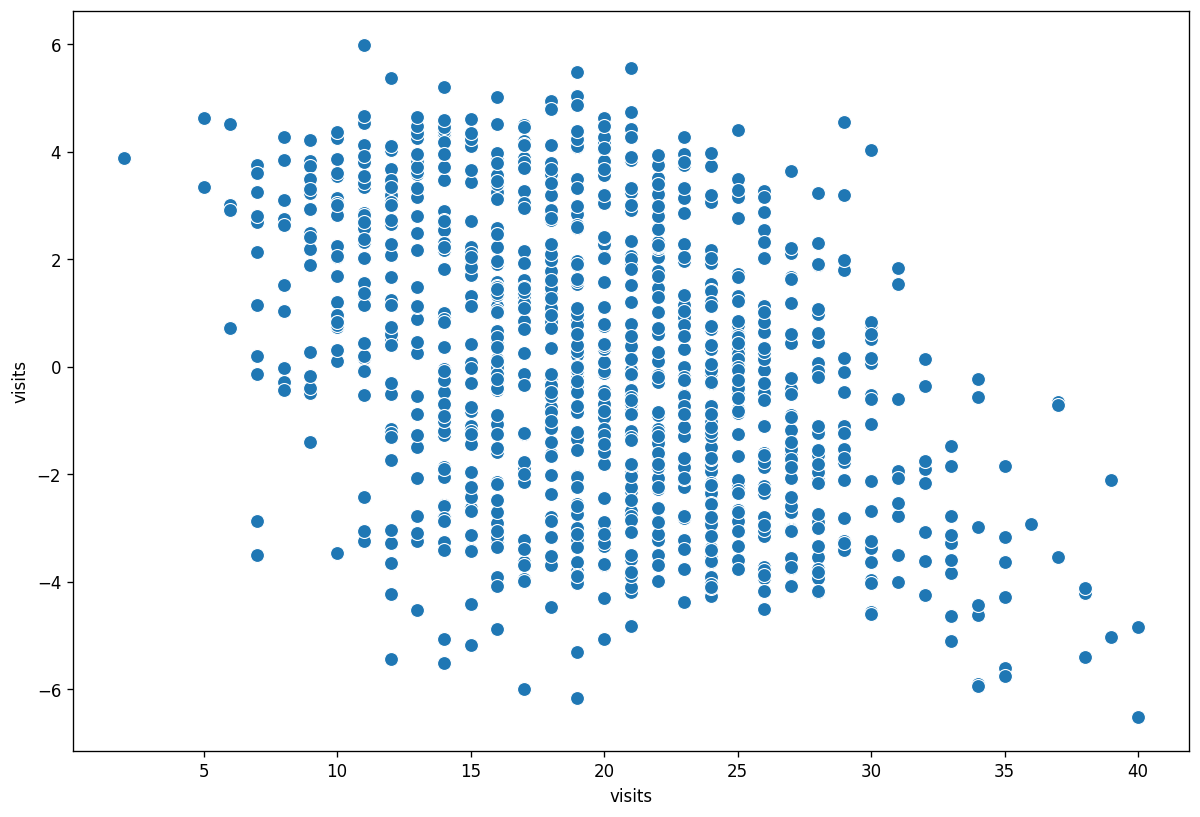

In [66]:
plt.figure(figsize=(12,8),dpi=120)
sns.scatterplot(x= y, y= residual,s=70)
plt.axhline(y=0,colors = "r",ls = "--")